# `explorationlib.local_gym`

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/parenthetical-e/explorationlib/blob/main/explorationlib/docs/local_gym.ipynb)

## Notebook setup

In [59]:
import matplotlib.pyplot as plt

# Notebook stuff
%load_ext nb_black
%load_ext autoreload
%autoreload 2

# Pretty plots
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True

plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = "16"

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>



The gym is where we come to get environments to explore. It is called a "gym" because the interface closely follows the OpenAI [gym](https://gym.openai.com), a library often used to study exploration for reward and reinforcment learning.

To make the environments useful for exploration, we will often need to add targets, from `explorationlib.targets`.

## `explorationlib.gym.Field`
> An open-field to explore, with no boundries.

In [60]:
from explorationlib.local_gym import Field
Field?

<IPython.core.display.Javascript object>

Init signature: Field()
Docstring:      An open-field to explore, with no boundries.
File:           ~/Code/explorationlib/explorationlib/local_gym.py
Type:           type
Subclasses:     Grid, Bounded


In [61]:
Field.step?

<IPython.core.display.Javascript object>

Signature: Field.step(self, action)
Docstring:
Run one timestep of the environment's dynamics. When end of
episode is reached, you are responsible for calling `reset()`
to reset this environment's state.

Accepts an action and returns a tuple (observation, reward, done, info).

Args:
    action (object): an action provided by the agent

Returns:
    observation (object): agent's observation of the current environment
    reward (float) : amount of reward returned after previous action
    done (bool): whether the episode has ended, in which case further step() calls will return undefined results
    info (dict): contains auxiliary diagnostic information (helpful for debugging, and sometimes learning)
File:      ~/Code/explorationlib/explorationlib/local_gym.py
Type:      function


In [62]:
Field.last?

<IPython.core.display.Javascript object>

Signature: Field.last(self)
Docstring:
Return the last transition: (state, reward, done, info)
        
File:      ~/Code/explorationlib/explorationlib/local_gym.py
Type:      function


In [63]:
# To make targets and values, see `explorationlib.targets`
Field.add_targets?

<IPython.core.display.Javascript object>

Signature:
Field.add_targets(
    self,
    targets,
    values,
    detection_radius=1,
    kd_kwargs=None,
)
Docstring: Add targets and their values
File:      ~/Code/explorationlib/explorationlib/local_gym.py
Type:      function


In [64]:
Field.check_targets?

<IPython.core.display.Javascript object>

Signature: Field.check_targets(self)
Docstring:
Check for targets, and update self.reward if
some are found in the given detection_radius.

Note: the deault d_func is the euclidian distance. 
To override provide a func(x, y) -> distance.
File:      ~/Code/explorationlib/explorationlib/local_gym.py
Type:      function


In [65]:
Field.reset?

<IPython.core.display.Javascript object>

Signature: Field.reset(self)
Docstring:
Resets the state of the environment and returns an initial observation.

Returns:
    observation (object): the initial observation.
File:      ~/Code/explorationlib/explorationlib/local_gym.py
Type:      function


In [66]:
# To make targets and values, see `explorationlib.targets`
Field.close?

<IPython.core.display.Javascript object>

Signature: Field.close(self)
Docstring:
Override close in your subclass to perform any necessary cleanup.

Environments will automatically close() themselves when
garbage collected or when the program exits.
File:      ~/anaconda3/envs/py3.6/lib/python3.6/site-packages/gym/core.py
Type:      function


In [67]:
Field.seed?

<IPython.core.display.Javascript object>

Signature: Field.seed(self, seed=None)
Docstring:
Sets the seed for this env's random number generator(s).

Note:
    Some environments use multiple pseudorandom number generators.
    We want to capture all such seeds used in order to ensure that
    there aren't accidental correlations between multiple generators.

Returns:
    list<bigint>: Returns the list of seeds used in this env's random
      number generators. The first value in the list should be the
      "main" seed, or the value which a reproducer should pass to
      'seed'. Often, the main seed equals the provided 'seed', but
      this won't be true if seed=None, for example.
File:      ~/Code/explorationlib/explorationlib/local_gym.py
Type:      function


In [68]:
Field.render?

<IPython.core.display.Javascript object>

Signature: Field.render(self, mode='human', close=False)
Docstring:
Renders the environment.

The set of supported modes varies per environment. (And some
environments do not support rendering at all.) By convention,
if mode is:

- human: render to the current display or terminal and
  return nothing. Usually for human consumption.
- rgb_array: Return an numpy.ndarray with shape (x, y, 3),
  representing RGB values for an x-by-y pixel image, suitable
  for turning into a video.
- ansi: Return a string (str) or StringIO.StringIO containing a
  terminal-style text representation. The text can include newlines
  and ANSI escape sequences (e.g. for colors).

Note:
    Make sure that your class's metadata 'render.modes' key includes
      the list of supported modes. It's recommended to call super()
      in implementations to use the functionality of this method.

Args:
    mode (str): the mode to render with

Example:

class MyEnv(Env):
    metadata = {'render.modes': ['human', 'rgb_array

## Example

local_gym_field_1: 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]


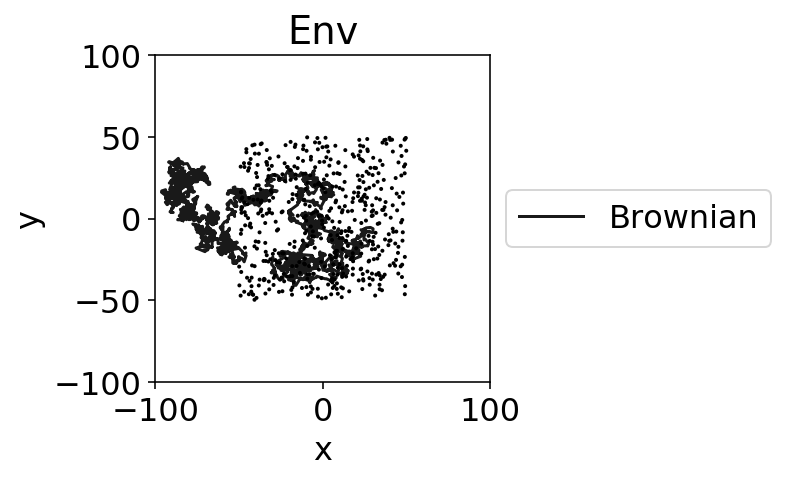

<IPython.core.display.Javascript object>

In [86]:
# Load, env and target creation
from explorationlib.targets import uniform_targets
from explorationlib.targets import constant_values
from explorationlib.local_gym import Field

# Load an random explorer
from explorationlib.agent import Diffusion2d

# Put the targets in a finite domain, to make visualization easier.
target_boundary = (50, 50) 
targets = uniform_targets(500, target_boundary)
values = constant_values(targets, 1)

# Create a Field, and give it targets with values
env = Field()
env.add_targets(targets, values, detection_radius=1)

# Create a random walker
brown = Diffusion2d(min_length=0.1,
                          scale=1,
                          detection_radius=1)

# Run an experiment, to see how the walker moves in the Field
from explorationlib.run import experiment
from explorationlib.util import load

exp_name = f"data/local_gym_field_1.pkl"
num_steps = 10000
num_experiments = 1
experiment(
    exp_name,
    brown,
    env,
    num_steps=num_steps,
    num_experiments=num_experiments,
)

# Load the data from the exp
exp_data = load(exp_name)

# Plot the targets, and the walkers path on the field
from explorationlib.plot import plot_targets2d
from explorationlib.plot import plot_position2d

ax = plot_targets2d(env, boundary=plot_boundary, title="Env")
ax = plot_position2d(
    exp_data,
    boundary=plot_boundary,
    label="Brownian",
    color="black",
    alpha=0.9,
    ax=ax,
)


## `explorationlib.local_gym.Bounded`
_Note:_ Usage is the same as `Field`. See above for interface docs.

In [32]:
from explorationlib.local_gym import Bounded
Bounded?

Init signature: Bounded(boundary, mode='stopping')
Docstring:     
An open-field to explore, with boundries.

Parameters
----------
boundary : 2-tuple (x, y)
    The absolute value of the 2d boundary.
mode: str
    How to handle collisions with the boundary. 
    - stopping: stop movement
    - absorbing: stop movement and end the run
    - periodic: loop back around, aka pacman mode
                (not yet implemented).
    
File:           ~/Code/explorationlib/explorationlib/local_gym.py
Type:           type
Subclasses:     


## Example

local_gym_bounded_1: 100%|██████████| 1/1 [00:02<00:00,  2.21s/it]


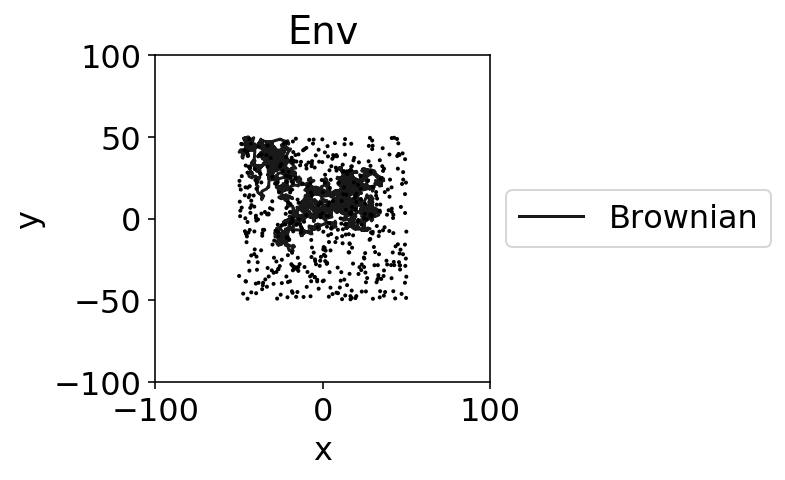

<IPython.core.display.Javascript object>

In [85]:
# Load, env and target creation
from explorationlib.targets import uniform_targets
from explorationlib.targets import constant_values
from explorationlib.local_gym import Bounded

# Load an random explorer
from explorationlib.agent import Diffusion2d

# Put the targets in a finite domain, to make visualization easier.
target_boundary = (50, 50) 
targets = uniform_targets(500, target_boundary)
values = constant_values(targets, 1)

# Create a Bounded, and give it targets with values
# Use stopping mode to see how th agent gets
# stuck against the walls.
env = Bounded(boundary=target_boundary, mode="stopping")
env.add_targets(targets, values, detection_radius=1)

# Create a random walker
brown = Diffusion2d(min_length=0.1,
                          scale=1,
                          detection_radius=1)

# Run an experiment, to see how the walker moves in the Field
from explorationlib.run import experiment
from explorationlib.util import load

exp_name = f"data/local_gym_bounded_1.pkl"
num_steps = 10000
num_experiments = 1
experiment(
    exp_name,
    brown,
    env,
    num_steps=num_steps,
    num_experiments=num_experiments,
)

# Load the data from the exp
exp_data = load(exp_name)

# Plot the targets, and the walkers path on the field
from explorationlib.plot import plot_targets2d
from explorationlib.plot import plot_position2d

ax = plot_targets2d(env, boundary=plot_boundary, title="Env")
ax = plot_position2d(
    exp_data,
    boundary=plot_boundary,
    label="Brownian",
    color="black",
    alpha=0.9,
    ax=ax,
)

## `explorationlib.gym.Grid`
A `Grid` is `Field` with only integer positions, which are forced by calling `int(.)` if necessary. 

_Note:_ Usage is the same as `Field`. See above for interface docs.

In [33]:
from explorationlib.local_gym import Grid
Grid?

Init signature: Grid()
Docstring:      An open-grid to explore, with no boundries.
File:           ~/Code/explorationlib/explorationlib/local_gym.py
Type:           type
Subclasses:     
